<a href="https://colab.research.google.com/github/dokeyuka/deep-learning-practice/blob/main/deep_learning_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip
!pip install torch 


     |████████████████████████████████| 2.1 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [2]:
import torch
import torchvision

# 1 simple perceptron
## (1) model definition

In [3]:
class SimplePerceptron(object):

  #入力次元n、パラメータ：重みwとバイアスbの初期化
  def __init__(self, input_dim):
    self.input_dim = input_dim
    self.w = np.random.normal(size= (input_dim, ))
    self.b = 0.
  
  #受け取つた電気信号を次に伝搬
  def forward(self, x):
    y = step(np.matmul(self.w, x) + self.b)
    return y
  def compute_deltas(self, x, t):
    y = self.forward(x)
    delta = y - t
    dw = delta * x
    db = delta
    return dw, db

def step(x):
    return 1*(x > 0)

## (2) preparetion of data

In [4]:
import numpy as np

#input dimention
d = 2
#number of data
N = 20

mean = 5

#平均0正規分布に従う10個のデータ
x1 = np.random.randn(N//2, d) + np.array([0, 0])
#平均5正規分布に従う10個のデータ
x2 = np.random.randn(N//2, d) + np.array([mean, mean])

#入力データ
x = np.concatenate((x1, x2), axis = 0)

#出力データ(0,1の配列)
t1 = np.zeros(N//2)
t2 = np.ones(N//2)
t = np.concatenate((t1, t2))



## (3) モデルの構築

In [5]:
model = SimplePerceptron(input_dim = d)

## (4) モデルの学習

In [6]:
def compute_loss(dw, db):
  #学習の終了判定のために誤差があるかどうかを返す
  return all(dw == 0)*(db == 0)

def train_step(x, t):
  #データを用いてパラメータを更新
  dw, db = model.compute_deltas(x, t)
  loss = compute_loss(dw, db)
  model.w = model.w - dw
  model.b = model.b - db
  return loss

while True:
  classified = True
  for i in range(N):
    loss = train_step(x[i], t[i])
    classified *= loss
  if classified:
    break



## (5) モデルの評価

In [7]:
print('w:', model.w)
print('b:', model.b)


w: [1.13799956 2.52508906]
b: -6.0


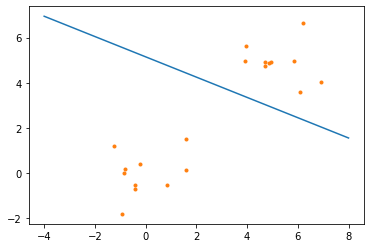

In [8]:
from matplotlib import pyplot as plt
s = np.linspace(-4, 8, 100)

y = -(model.w[0] *s - 13)/model.w[1]

plt.plot(s, y)
plt.plot(x[:,0], x[:,1], '.')

In [9]:

print('(0,0) =>', model.forward([0, 0]))
print('(5,5) =>', model.forward([5, 5]))


(0,0) => 0
(5,5) => 1
